In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city= pd.read_csv('city_data.csv')
ride= pd.read_csv('ride_data.csv')
# Combine the data into a single dataset
city_ride_df= pd.merge(city, ride,on='city',how= 'left')

# Display the data table for preview
city_ride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
city_ride_df=city_ride_df[['city','date','fare','ride_id','driver_count','type']]
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [3]:
# The x and y coordinates for Urban city type
urban_list= city_ride_df.loc[city_ride_df['type']=='Urban']
urban_avg_fare_y= urban_list.groupby('city')['fare'].mean()
urban_tot_rides_x=urban_list.groupby('city')['ride_id'].count()
urban_tot_drivers= urban_list.groupby('city')['driver_count'].mean()


In [4]:
# The x and y coordinates for Suburban city type
suburban_list= city_ride_df.loc[city_ride_df['type']=='Suburban']
suburban_avg_fare_y= suburban_list.groupby('city')['fare'].mean()
suburban_tot_rides_x= suburban_list.groupby('city')['ride_id'].count()
suburban_tot_drivers= suburban_list.groupby('city')['driver_count'].mean()

In [5]:
# The x and y coordinates for Rural city type
rural_list= city_ride_df.loc[city_ride_df['type']=='Rural']
rural_avg_fare_y= rural_list.groupby('city')['fare'].mean()
rural_tot_rides_x=rural_list.groupby('city')['ride_id'].count()
rural_tot_drivers= rural_list.groupby('city')['driver_count'].mean()

## Bubble Plot of Ride Sharing Data

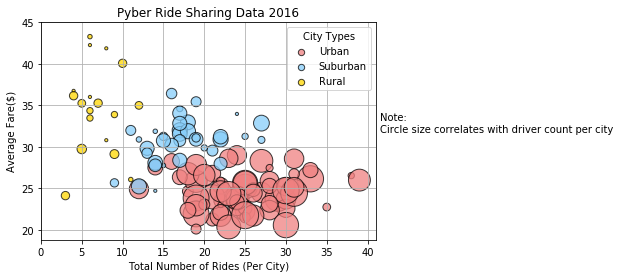

In [60]:
#Build the scatter plots for each city types
urban=plt.scatter(urban_tot_rides_x, urban_avg_fare_y,marker="o", c="lightcoral", edgecolors="black",
            s=urban_tot_drivers*10, alpha=0.75,label= 'Urban')

suburban=plt.scatter(suburban_tot_rides_x, suburban_avg_fare_y,marker="o", c="lightskyblue", edgecolors="black",
            s=suburban_tot_drivers*10, alpha=0.75,label= 'Suburban')

rural=plt.scatter(rural_tot_rides_x, rural_avg_fare_y,marker="o", c="gold", edgecolors="black",
            s=rural_tot_drivers*10, alpha=0.75,label= 'Rural')

plt.title("Pyber Ride Sharing Data 2016")

plt.xlabel("Total Number of Rides (Per City)")

plt.ylabel('Average Fare($)')

plt.figtext(0.91,0.5, "Note:\nCircle size correlates with driver count per city")

legend=plt.legend(handles=[urban,suburban,rural],loc="best")

legend.set_title("City Types")
legend.legendHandles[0]._sizes=[40]
legend.legendHandles[1]._sizes=[40]
legend.legendHandles[2]._sizes=[40]

plt.grid()

plt.xlim(0,41)
plt.ylim(18.8,45)

# Save Figure
plt.savefig('city type bubble plot.png')

plt.show()

## Total Fares by City Type

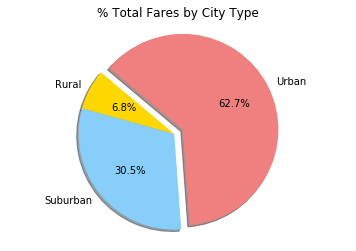

In [61]:
# Calculate Type Percents
tot_fares_type=city_ride_df.groupby('type')['fare'].sum()
#tot_fares_type
# Build Pie Chart
labels= ["Rural","Suburban","Urban"]
colors= ["gold",'lightskyblue','lightcoral']
explode=[0,0,0.1]

plt.pie(tot_fares_type,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title("% Total Fares by City Type")

# Save Figure
plt.savefig("Total Fares by City Type")

plt.show()

## Total Rides by City Type

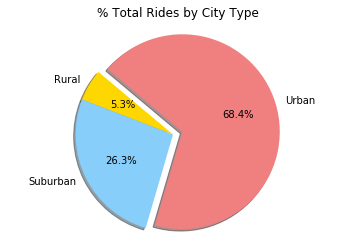

In [62]:
tot_rides_type=city_ride_df.groupby('type')['ride_id'].count()
#tot_fares_type
# Build Pie Chart
labels= ["Rural","Suburban","Urban"]
colors= ["gold",'lightskyblue','lightcoral']
explode=[0,0,0.1]

plt.pie(tot_rides_type,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title("% Total Rides by City Type")

# Save Figure
plt.savefig("Total Rides by City Type")

plt.show()

## Total Drivers by City Type

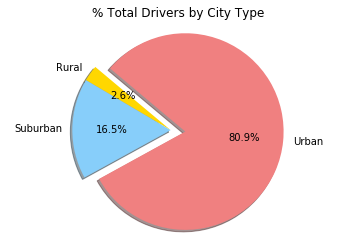

In [131]:

tot_drivers_type=city.groupby('type')['driver_count'].sum()
#tot_drivers_type 

# Build Pie Chart
labels= ["Rural","Suburban","Urban"]
colors= ["gold",'lightskyblue','lightcoral']
explode=[0,0,0.15]

plt.pie(tot_drivers_type,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title("% Total Drivers by City Type")

# Save Figure
#plt.savefig("Total Drivers by City Type")

plt.show()